# Problem Set 3 (Group 1)
# Alysia, Christopher, Ketsia, Kevin, Osman, Yi

## Due Tuesday, December 15
##Math 624 Fall 2023


In [ ]:
import numpy
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import norm

###Problem 1.

The $Wikipedia$ on Simpson's rule describes an idea for deriving the rule
by averaging lower order approximation formulas. More specifically, take a suitable average of the trapezoid and midpoint rules so that the $O((b - a)^3)$ error terms cancel. Write a detailed description of how this works using $n$ subintervals and back things up with a table of values for an example where you compute the trapezoid and midpoint rules for various values of $n$ and show how the suitable average of errors cancel out.

A: On the $Wikipedia$ for Simpson's rule, for T representing Trapezoid rule, M representing Midpoint rule, and S representing Simpson's rule, we are told that $((2M+T)/3)=S$, but it does not specifiy subscripts. Further investigation in Stewart's Calculus Textbook reveals the following: $((\frac{2}{3}M{n}+\frac{1}{3}T{n}))=S_{2n}$.

We pick a function that is at least three times differential (so that we don't get exact approximations using Simpson's rule): $x^{6}$, and apply the Midpoint & Trapezoidal rule on it for n: {1,$\cdots$,20}, while for Simpson's rule we apply the rule for n: {2,$\cdots$,40}. We also apply $\frac{2}{3}M_{i}+\frac{1}{3}T_{i}$ to get the  suitable average, which we show to be equivalent to $S_{2i}$. Finally, we will also have 4 error columns for each of the four approximations.

In [ ]:
#define our function
def f(x):
  return x**6
#define our delta x/length of subintervals
def delta(a,b,n):
  return((b-a)/n)

#midpoint rule, a=start, b=end, n=# of subintervals, f=function
def midpt(a,b,n,f):
  d=delta(a,b,n)
  area=0.
  for i in numpy.linspace(a,b,n,endpoint=False):
    area=area+(f(.5*((i)+(i+d))))
  area=area*d
  return area

#trapezoid rule, a=start, b=end, n=# of subintervals, f=function
def trap(a,b,n,f):
  d=delta(a,b,n)
  area=0.
  t=[]
  t.append(1)
  for i in numpy.linspace(a,b,int(n-1)):
    t.append(2)
  t.append(1)
  l=[]
  for i in numpy.linspace(a,b,n+1):
    l.append(i)
  for i in range(n+1):
    area=area+(t[i])*(f(l[i]))
  area=area*d*.5
  return area

#this defines the simpson's coefficients that we need for the future, using endpoints & # of subintervals
def simpco(a,b,n):
  l=[]
  l.append(1)
  for i in numpy.linspace(a,b,int((n/2)-1)):
    l.append(4)
    l.append(2)
  l.append(4)
  l.append(1)
  return l

#this defines simpson's rule, taking endpoints, number of subintervals, and function.
def simp(a,b,n,f):
  area=0.
  s=simpco(a,b,n)
  d=delta(a,b,n)
  l=[]
  for i in numpy.linspace(a,b,int(n+1)):
    l.append(i)
  for i in range(n+1):
    area=area+((s[i]*f(l[i])))
  area=(d*area/3)
  return area

#this tabulates for n up to 20, w/10 decimal places
exact=127/7
data=[['n','Exact','M','M-error','T','T-error','S','S-error','SA','SA-error']]
for i in range(1,21):
  m=midpt(1,2,i,f)
  t=trap(1,2,i,f)
  s=simp(1,2,2*i,f)
  sa=(((2*m)+t)/3)
  data.append([i,exact,m,exact-m,t,exact-t,s,exact-s,sa,exact-sa,])
print(tabulate(data,headers='firstrow',tablefmt='fancy_grid',floatfmt=".10f"))

╒═════╤═══════════════╤═══════════════╤══════════════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   n │         Exact │             M │      M-error │             T │        T-error │             S │       S-error │            SA │      SA-error │
╞═════╪═══════════════╪═══════════════╪══════════════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│   1 │ 18.1428571429 │ 11.3906250000 │ 6.7522321429 │ 32.5000000000 │ -14.3571428571 │ 18.4270833333 │ -0.2842261905 │ 18.4270833333 │ -0.2842261905 │
├─────┼───────────────┼───────────────┼──────────────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│   2 │ 18.1428571429 │ 16.2687988281 │ 1.8740583147 │ 21.9453125000 │  -3.8024553571 │ 18.1609700521 │ -0.0181129092 │ 18.1609700521 │ -0.0181129092 │
├─────┼───────────────┼───────────────┼──────────────┼───────────────┼────────────────┼─

Midpoint rule seems to give an underapproximation while Trapezoidal rule gives an overapproximation. Midpoint & Trapezoidal converges to 1 decimal place on the 14th & 17th step, while the suitable average converges on the 2nd step. The suitable average is so helpful, that while Midpoint & Trapezoid has not converged to 2nd decimal place even on the 20th step, for the suitable average, we see that convergence to 2nd, 3rd, 4th, & 5th decimal place occurs on the 3rd, 7th, 10th & 18th step respectively, which shows how the suitable average of errors cancel out.

###Problem 2.

In class, we estimated $\int_{R}  e^y dxdy$ where $R$ was the region defined by the intersection of ${(x, y) : 0 ≤ xy ≤ 1}$ with the rectangle $[−5, 5] \times [−5, 5]$. While the methods worked well, the Monte Carlo method for approximating wasn't very accurate. Here's an idea to replace the given integral with another one that when approximated using a Monte Carlo method will have a smaller 'standard deviation'.

It's straightforward to make the substitution $u = e^y$ so that the integral transforms to $\int_{P} 1dxdu$ where $P$ is a transformed region. Determine the region $P$, write down a random variable $X$ whose expected value is $\frac{I}{A}$ and whose variance is $\frac{I}{A}-(\frac{I}{A})^2$.

>(a) Determine the region $P$. Hint: it's a subset of the rectange $[−5, 5] \times [e^{-5}\times e^5]$.

A: The region, $P$, since $y=log(u)$, so ${(x, y) : 0 ≤ xy ≤ 1}$ becomes ${(x, u) : 0 ≤ xlog(u) ≤ 1}$ and the integral $\int_{P} 1dxdu$ over the rectangle $[−5, 5] \times [e^{-5}\times e^5]$.

>(b) Consider $x$ and $u$ to be uniformly distributed on the rectangle $[−5, 5] \times [e^{-5}\times e^5]$. Write down a random variable $X$ whose expected value is the proportion of the rectangle lying in $P$. So, $E(X) = \frac{I}{A}$ where $I = \int_{P} 1dxdu$ and $A = 10(e^5-e^{-5})$. Compute the variance of $X$.

A: $X(x,u)$ is a random variable taking the value 1 if ${0≤ x ln(u)≤ 1}$ and  $0$ otherwise.  $E(X) \text{ is } \frac{I}{A} \text{ where }I=\int_P 1 dx du \text{ and $A =10(e^5-e^{-5})$ is the area of the rectange.}$
$Var(X)=E(X^2)-(E(X))^2 = \frac{I}{A}-(\frac{I}{A})^2$.

> (c) Let $S = \frac{1}{n}(X+\cdots +X)$ be the sample average obtained by sampling n times the random variable $X$. Compute the mean and standard deviation of $S$.

A: Using linearity rules of Expectation: $E(S)=E(\frac{1}{n}(X+\cdots +X))=\frac{1}{n}E(X+\cdots +X)=\frac{1}{n}(E(X_1)+E(X_2)\cdots+E(X_n))=\frac{n}{n}E(X_{i's})=E(X)=\frac{I}{A}$, which from our notes in class we know $\approx 44.2419$.

Using rules of Variance, and that each X is i.i.d:
$Var(S)=Var(\frac{1}{n}(X+\cdots +X)=\frac{1}{n^2}Var(X+\cdots +X)=\frac{1}{n^2}(Var(X)+Var(X)\cdots+Var(X))=\frac{n}{n^2}Var(X)=\frac{1}{n}Var(X)=\frac{1}{n}((\frac{I}{A}-(\frac{I}{A})^2)$, so we'll have $\frac{(|44.2419-44.2419^2|)}{n}\approx\frac{1913.1038}{n}$
which means
 $\sigma(S)=\sqrt{(\frac{1}{n}(Var(X)))}=\sqrt{(\frac{1}{n}(\frac{I}{A}-(\frac{I}{A})^2)})\approx\sqrt{\frac{1913.1038}{n}}$

 >(d) Now choose $n = 100, 000$ and run the experiment on a computer and approximate the value of the integral.

A:

In [ ]:
#this is the rectangle (10*(e^5 - e^-5))
A=10*((math.e**5)-(math.e**(-5)))
#this approximates the integral using monte carlo.
def intapprox(n):
  count=0
  for i in range(n):
    rx=numpy.random.rand()
    x = ((1-rx)*(-5))+(5*rx)
    ru=numpy.random.rand()
    u = ((1-ru)*(math.e**-5))+(ru*(math.e**5))
    if 0 <= x*(math.log(u)) <= 1:
      count += 1
  count=count*A
  count=count/n
  return count

intapprox(100000)

43.67600974608645

>(e) Perform the experiment a few thousand times, plot a histogram of the experimental values, compare to a normal distribution with mean $(A)E(S)$ and standard deviation $(A)\sigma(S)$.

A: To find $(A)E(S)$ we will take the average of $n \frac{I}{A}$'s and multiply it by $(A)$.  For $(A)\sigma(S)$, we will take $((\frac{I}{A}-(\frac{I}{A})^2)$ for each $X$, divide the sum by $n$, and take the square root.

In [ ]:
experiments1=[intapprox(i) for i in range(1,2000)]


In [ ]:
#n=100000, so standard deviation is:
stdexp1=numpy.sqrt(1913.1038/100000)
meanexp1=44.2419
x = numpy.arange(0,350,1)

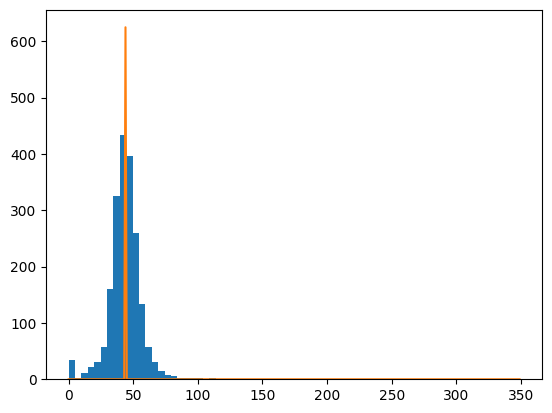

In [ ]:
plt.hist(experiments1,bins=60)
plt.plot(x,1000* norm.pdf(x, meanexp1,stdexp1))

>(f) Remember that the purpose of computation is $insight$, not numbers, try to come up with an insight that helps explain why this monte carlo integration works better after the change of variable.

A: Since the standard deviation is much smaller than before, we get 0.1383149955717022, from class notes, we get standard deviation as 1.5233040485259584.

The reason why we might have a smaller standard deviation might be: when we try to count the dots with random x and u value, if it is within the region 0<=xln(u)<=1,we just add 1 (as the integral is integral 1 dxdu over the region P), but before the transformation, if the point is within the region, we had to add e^y.

###Problem 3.

Use a two dimensional Simpson's rule to approximate the integral in the
previous problem. To be precise, define a function $f:\mathbb{R}^2 → \mathbb{R}$ by $$
f(x,y) = \cases{e^y\ if\  0\leq xy\leq 1\\0\ otherwise}
$$

and compute $\int_{-5}^5\int_{-5}^5 f(x,y)dxdy$ using Simpson's rule. To be concrete, subdivide the rectange $[-5,5]\times[-5,5]$ into $10\times10=100$ subrectangles.

A: https://www.geogebra.org/3d is helpful in visualizing here.

The formula we use is 1/9 double sum f(i,j)*S(i,j),
where S is an 11x11 matrix corresponding to the Simpson's coefficients.



In [ ]:
#this gives us Simpon's Coefficient's Matrix
S=[[1,4,2,4,2,4,2,4,2,4,1],[4,16,8,16,8,16,8,16,8,16,8,4],[2,8,4,8,4,8,4,8,4,8,2],[4,16,8,16,8,16,8,16,8,16,8,4],[2,8,4,8,4,8,4,8,4,8,2],[4,16,8,16,8,16,8,16,8,16,8,4],[2,8,4,8,4,8,4,8,4,8,2],[4,16,8,16,8,16,8,16,8,16,8,4],[2,8,4,8,4,8,4,8,4,8,2],[4,16,8,16,8,16,8,16,8,16,8,4],[1,4,2,4,2,4,2,4,2,4,1]]
#this defines the function we are integrating
def f(x,y):
  return numpy.e**(y)
#the variable that will be used to store volume
A=0
#we are integrating over [-5,5] x [-5,5] for absolute value of (x*y) less than or equal to 1
for y in range(5,-6,-1):
  for x in range(-5,6):
    A=(A+(f(x,y))*(S[x+5][abs(y-5)]) if (abs(x*y))<1 else A)
print("We get "+str(A/45)+", which is only "+str(meanexp1-(A/45))+" away from the exact answer.")

We get 42.08293633206647, which is only 2.1589636679335342 away from the exact answer.


In [ ]:
#to check answer
#from Wolfram Alpha, the function e^y, over [-5,5] x [-5,5] is approximately 1484.1
#this is not limited by the piecewise function
A=0
for y in range(5,-6,-1):
  for x in range(-5,6):
    A=A+(f(x,y))*(S[x+5][abs(y-5)])
print(A/9)

1491.4359591780474
